In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Go through each with ppt slides !!! 

In [5]:
""" 
S: underlying asset
K: strike price 
"""


def call_payoff(S, K):
    payoff = np.maximum(S - K, 0)
    return payoff

def put_payoff(S, K):
    payoff = np.maximum(K - S, 0)
    return payoff

def digital_call_payoff(S, K):
    payoff = 1*(S>K)  # S > K: return Bool. True* 1 = 1, False* 1 = 0
    return payoff

def digital_put_payoff(S, K):
    payoff = 1*(S<K)
    return payoff

def risk_free_payoff(S, P):    # S: underlying asset, P : const risk -free payoff 
    payoff = [P] * len(S)
    return payoff


In [6]:
whos

Variable              Type        Data/Info
-------------------------------------------
call_payoff           function    <function call_payoff at 0x12fe9e0c0>
digital_call_payoff   function    <function digital_call_payoff at 0x12fe9e020>
digital_put_payoff    function    <function digital_put_payoff at 0x107e0cae0>
np                    module      <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
plt                   module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
put_payoff            function    <function put_payoff at 0x12fe9e160>
risk_free_payoff      function    <function risk_free_payoff at 0x107e0cb80>
stats                 module      <module 'scipy.stats' fro<...>scipy/stats/__init__.py'>


In [7]:
call_payoff(10, 5)  # 10 - 5 

np.int64(5)

In [8]:
ST = np.arange(0, 10) 
ST

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
call_payoff(ST, K = 5)

array([0, 0, 0, 0, 0, 0, 1, 2, 3, 4])

### Call Option payoff diagram 

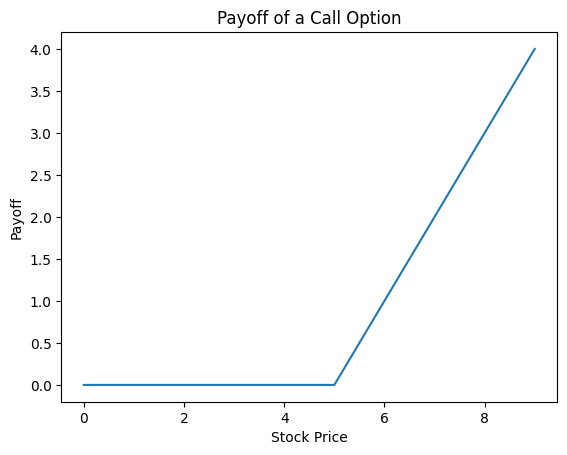

In [10]:
# set up axis 
X = ST 
Y = call_payoff(ST, K = 5)

plt.plot(X, Y)
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Payoff of a Call Option')
plt.show()

### Put + Call 

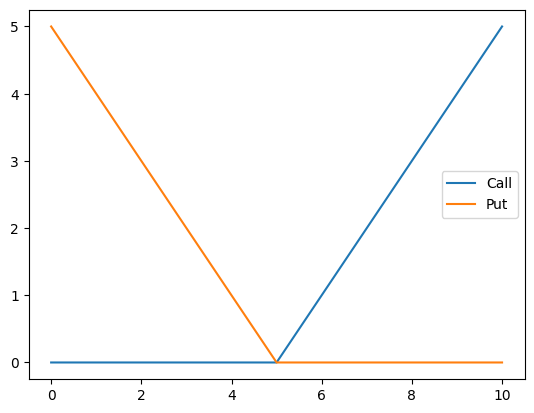

In [11]:
ST = np.arange(0, 11)  # x- axis (0, 10)

CK5 = call_payoff(ST, K = 5)  # call at k = 5
PK5 = put_payoff(ST, K = 5) # put at k = 5

plt.plot(ST, CK5, label = 'Call')  # plt.plot ( x- axis, y- axis, label = 'label name')
plt.plot(ST, PK5, label = 'Put')

plt.legend()

### Sraddle 


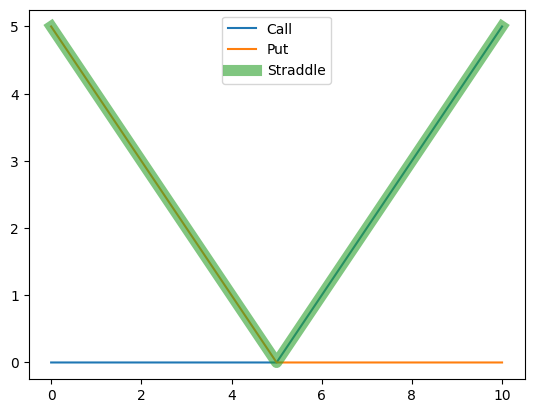

In [12]:
S_t = np.arange(0, 11)  # x- axis

CK5 = call_payoff(S_t, K = 5)
PK5 = put_payoff(S_t, K = 5)
STRADDLE  = CK5  + PK5  # 邏輯：加總 

plt.plot(ST, CK5, label = 'Call')
plt.plot(ST, PK5, label = 'Put')
plt.plot( ST, STRADDLE, lw = 8, alpha = 0.6, label = 'Straddle')
plt.legend()

### BS Model : Calculate Call Price 
- which will be used in future 

In [13]:
def BS_call(S, K, r, t, Sigma):
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    d2 = d1 - Sigma * np.sqrt(t)
    Call = S * stats.norm.cdf(d1,0.0,1.0) - K * np.exp(-r*t) * stats.norm.cdf(d2,0.0,1.0)
    return Call

def BS_put(S, K, r, t, Sigma):
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    d2 = d1 - Sigma * np.sqrt(t)
    Put = K * np.exp(-r*t) * stats.norm.cdf(-d2,0.0,1.0) - S * stats.norm.cdf(-d1,0.0,1.0)
    return Put

### Payoff and profit of call option 

In [14]:
""" 
np.linspace(start, stop, num, endpoint=True):
np.linspace is a NumPy function that generates 
a sequence of evenly spaced numbers over a specified range.
"""



S = np.linspace(0.0001, S_t*2, 10000, endpoint=True)
print(S)

[[1.00000000e-04 1.00000000e-04 1.00000000e-04 ... 1.00000000e-04
  1.00000000e-04 1.00000000e-04]
 [9.99899990e-05 3.00010001e-04 5.00030003e-04 ... 1.70015002e-03
  1.90017002e-03 2.10019002e-03]
 [9.99799980e-05 5.00020002e-04 9.00060006e-04 ... 3.30030003e-03
  3.70034003e-03 4.10038004e-03]
 ...
 [2.00020002e-08 1.99959998e+00 3.99919994e+00 ... 1.59967997e+01
  1.79963997e+01 1.99959996e+01]
 [1.00010001e-08 1.99979999e+00 3.99959997e+00 ... 1.59983998e+01
  1.79981998e+01 1.99979998e+01]
 [0.00000000e+00 2.00000000e+00 4.00000000e+00 ... 1.60000000e+01
  1.80000000e+01 2.00000000e+01]]


<>:20: SyntaxWarning: invalid escape sequence '\%'
<>:20: SyntaxWarning: invalid escape sequence '\%'
/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_66631/1485105723.py:20: SyntaxWarning: invalid escape sequence '\%'
  plt.title('Call option ($S_t = 5, K = 5, r = 5\%, t = 0.5, \sigma = 10\%$)')


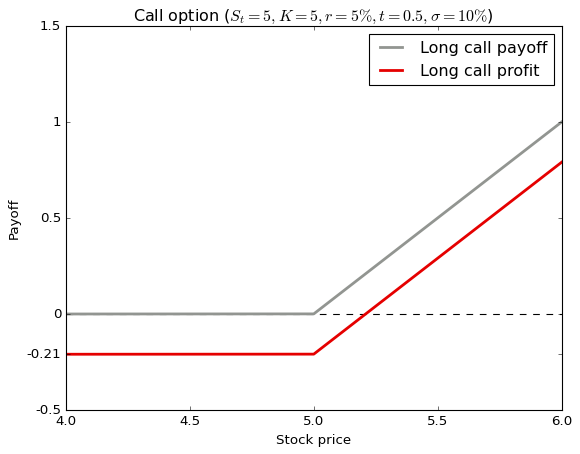

In [15]:
import warnings
warnings.filterwarnings("ignore")


plt.style.use('classic')
S_t = 5
K = 5
r = 0.05
t = 0.5
Sigma = 0.1
Call_price = BS_call(S_t, K, r, t, Sigma)
S = np.linspace(0.0001, S_t*2, 10000, endpoint=True)


fig, ax = plt.subplots()

## Setup the plot
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Call option ($S_t = 5, K = 5, r = 5\%, t = 0.5, \sigma = 10\%$)')
plt.ylabel('Payoff')
plt.xlabel('Stock price')
plt.plot(S, call_payoff(S, K), color='xkcd:gray', linewidth=2.5)
plt.plot(S, call_payoff(S, K) - Call_price, color='xkcd:red', linewidth=2.5)
plt.yticks([-0.5, -Call_price, 0, 0.5, 1, 1.5], ['-0.5',str(-round(Call_price,2)), '0', '0.5', '1', '1.5'])

## Setup specific range 

plt.xlim(4,6)
plt.ylim(-0.5,1.5)
plt.legend(['Long call payoff', 'Long call profit'], loc='best')
#plt.savefig('call_payoff.png', bbox_inches="tight", dpi=600)
plt.show()



## Difff Types of intrinsic value 

### Volatility and option value ( insurance value )
- Getting more value if volatility ( sigma ) is higher 

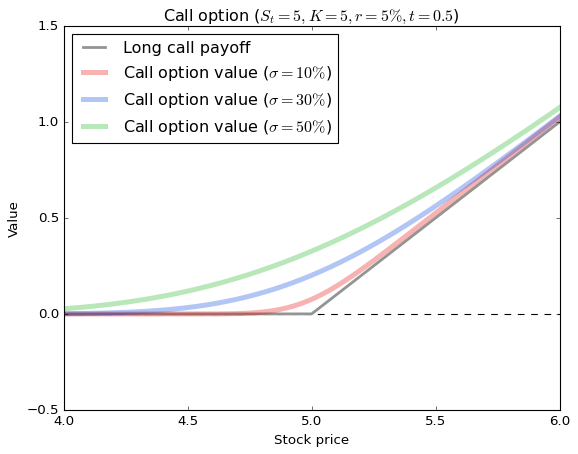

In [15]:
plt.style.use('classic')
S_t = 5
K = 5
r = 0.05
t = 0.5
Sigma = 0.1
Call_price = BS_call(S_t, K, r, t, Sigma)
S = np.linspace(0.0001, S_t*2, 10000, endpoint=True)  
# The S array represents a range of possible stock prices to evaluate the option value.

fig, ax = plt.subplots()
fig.patch.set_facecolor('white') # white background
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Call option ($S_t = 5, K = 5, r = 5\%, t = 0.5$)')
plt.ylabel('Value')
plt.xlabel('Stock price')
plt.plot(S, call_payoff(S, K), color='xkcd:gray', linewidth=2.5)
plt.plot(S, BS_call(S, K, r, 0.1, Sigma), color='xkcd:red', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_call(S, K, r, 0.1, 0.3), color='xkcd:blue', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_call(S, K, r, 0.1, 0.5), color='xkcd:green', linewidth=4.5,alpha=0.3)

# setting limit for x , y axis ( can be removed to see real value )
plt.xlim(4,6)
plt.ylim(-0.5,1.5)
plt.legend(['Long call payoff', 'Call option value ($\sigma=10\%$)', 'Call option value ($\sigma=30\%$)',
'Call option value ($\sigma=50\%$)'], loc='best')
#plt.savefig('call_vola.png', bbox_inches="tight", dpi=600)
plt.show()



### Time to maturity and option value ( time value )
- higher call value when more time to maturity (with more time to fall ITM ) 
    -   --> only for call option

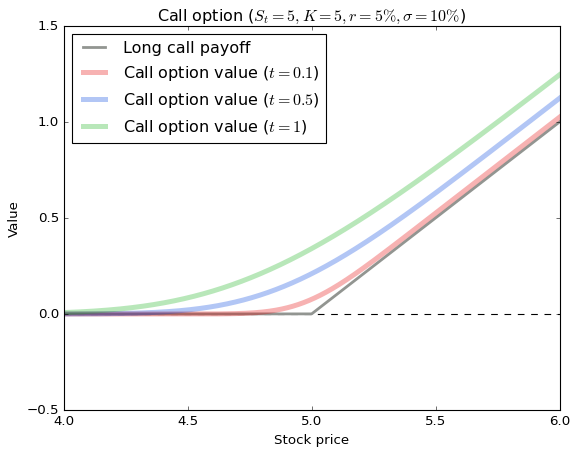

In [16]:
plt.style.use('classic')
S_t = 5
K = 5
r = 0.05
t = 0.5
Sigma = 0.1
Call_price = BS_call(S_t, K, r, t, Sigma)  # variating t to see diff time to maturity 
S = np.linspace(0.0001, S_t*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Call option ($S_t = 5, K = 5, r = 5\%, \sigma = 10\%$)')
plt.ylabel('Value')
plt.xlabel('Stock price')

plt.plot(S, call_payoff(S, K), color='xkcd:gray', linewidth=2.5)
plt.plot(S, BS_call(S, K, r, 0.1, Sigma), color='xkcd:red', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_call(S, K, r, 0.5, Sigma), color='xkcd:blue', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_call(S, K, r, 1, Sigma), color='xkcd:green', linewidth=4.5,alpha=0.3)
plt.xlim(4,6)
plt.ylim(-0.5,1.5)
plt.legend(['Long call payoff', 'Call option value ($t=0.1$)', 'Call option value ($t=0.5$)',
'Call option value ($t=1$)'], loc='best')
#plt.savefig('call_ttm.png', bbox_inches="tight", dpi=600)
plt.show()


- Put option --> more time to maturity leads to lower value 
    - since more time to fall OTM  ( opposite of call option )

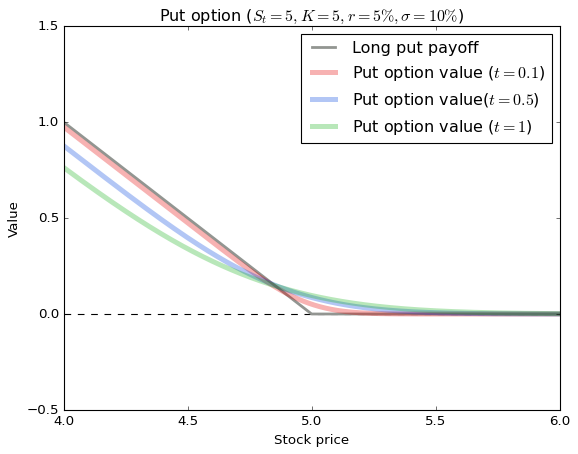

In [17]:
plt.style.use('classic')

S_t = 5
K = 5
r = 0.05
t = 0.5
Sigma = 0.1
S = np.linspace(0.0001, S_t*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Put option ($S_t = 5, K = 5, r = 5\%, \sigma = 10\%$)')
plt.ylabel('Value')
plt.xlabel('Stock price')
plt.plot(S, put_payoff(S, K), color='xkcd:gray', linewidth=2.5)
plt.plot(S, BS_put(S, K, r, 0.1, Sigma), color='xkcd:red', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_put(S, K, r, 0.5, Sigma), color='xkcd:blue', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_put(S, K, r, 1, Sigma), color='xkcd:green', linewidth=4.5,alpha=0.3)

## setting limit for x , y axis ( can be removed to see real value )
plt.xlim(4,6)
plt.ylim(-0.5,1.5)
plt.legend(['Long put payoff', 'Put option value ($t=0.1$)', 'Put option value($t=0.5$)',
'Put option value ($t=1$)'], loc='best')
#plt.savefig('put_ttm.png', bbox_inches="tight", dpi=600)
plt.show()

### Covered Calls 
- long stock 
- short call

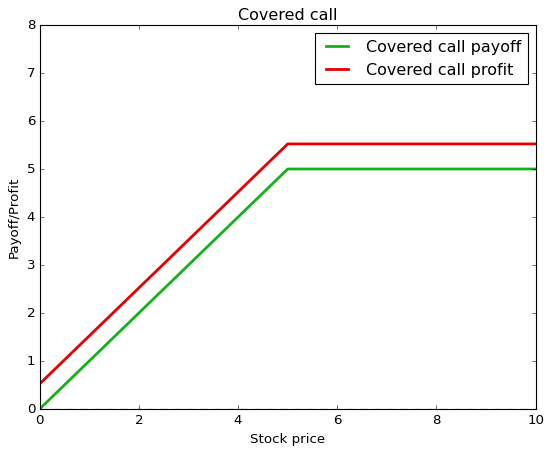

In [16]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)   # potential stock price ( underlying asset )

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Covered call')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = S - call_payoff(S, 5)  # Long stock, short call ( + S - call )
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)  # green line

S_t = 5
r = 0.05
t = 1
Sigma = 0.2
Cost = -BS_call(S_t, 5, r, t, Sigma) # shorting call, get premium. Which move the diagram up 

plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5) # red line

## 
plt.xlim(0,10)
plt.ylim(0,8)
plt.legend(['Covered call payoff', 'Covered call profit'], loc='best')
#plt.savefig('Covered_call.png', bbox_inches="tight", dpi=600)
plt.show()


### Protective puts 
- long stock 
- long put 

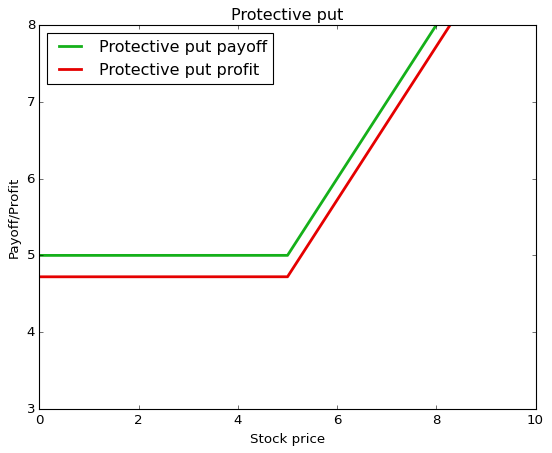

In [19]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Protective put')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = S + put_payoff(S, 5)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.2
Cost = BS_put(S_t, 5, r, t, Sigma)  # cost for long put : move the diagram down

plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(3,8)
plt.legend(['Protective put payoff', 'Protective put profit'], loc='best')
#plt.savefig('Protective_put.png', bbox_inches="tight", dpi=600)
plt.show()


### Bull spread with two calls 
- long call at K1 
- short call at K2 
- k1 < k2
- C1 > C2 

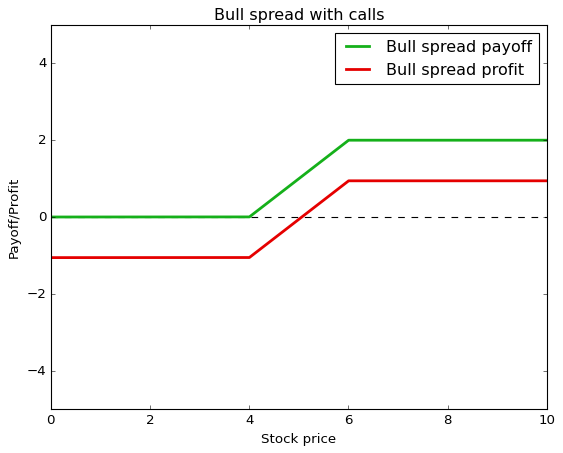

In [21]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Bull spread with calls')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = call_payoff(S, 4) - call_payoff(S, 6)  # k1 = 4, k2 = 6
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_call(S_t, 4, r, t, Sigma) - BS_call(S_t, 6, r, t, Sigma)
## since k1 = 4, k2 = 6, c1 > c2, c1 - c2 > 0 , - (+) = -  --> move downward 


plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Bull spread payoff', 'Bull spread profit'], loc='best')
#plt.savefig('Bull_spread_call.png', bbox_inches="tight", dpi=600)
plt.show()



### Bull spread with two puts 
- long put at k1 
- short put at k2 
- k2 > k1 
- P2 > P1 

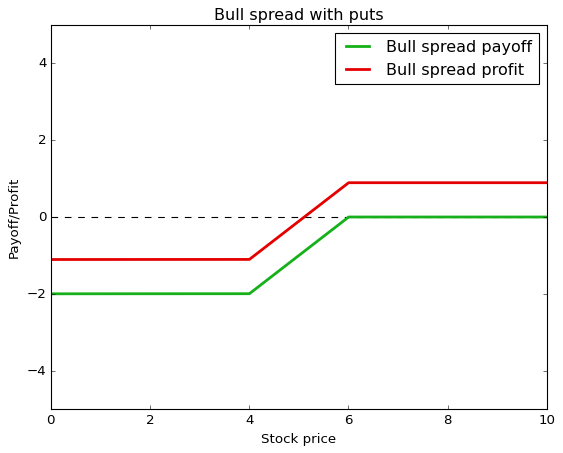

In [22]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Bull spread with puts')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = put_payoff(S, 4) - put_payoff(S, 6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)

S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_put(S_t, 4, r, t, Sigma) - BS_put(S_t, 6, r, t, Sigma)
# since k1 = 4, k2 = 6, p1 < p2, p1 - p2 < 0, -(-) = + --> move downward


plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Bull spread payoff', 'Bull spread profit'], loc='best')
#plt.savefig('Bull_spread_put.png', bbox_inches="tight", dpi=600)
plt.show()



### Bear spread with calls
- k1 < k2
- short call at k1 ( get premium)
- long call at k2 (pay premium)
- C1 > C2 
- --> move upward

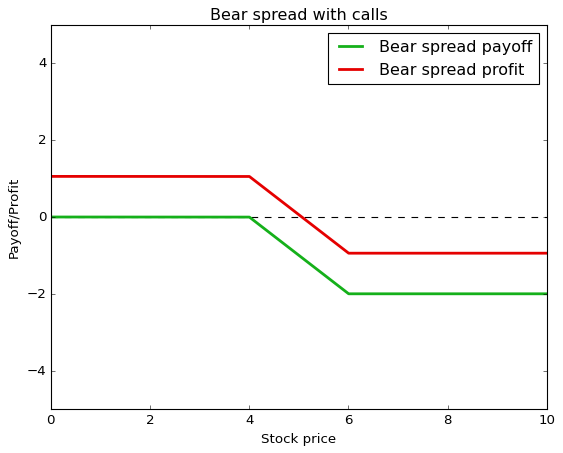

In [23]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Bear spread with calls')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = call_payoff(S, 6) - call_payoff(S, 4)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)

S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_call(S_t, 6, r, t, Sigma) - BS_call(S_t, 4, r, t, Sigma)
# since k1 = 6, k2 = 4, c1 < c2, c1 - c2 < 0, -(-) = + --> move upward

plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Bear spread payoff', 'Bear spread profit'], loc='best')
#plt.savefig('Bear_spread_call.png', bbox_inches="tight", dpi=600)
plt.show()



### Bear spread with puts 
- k1 < k2
- short put at k1 ( get premium )
- long put at k2 ( pay premium)
- P2 > P1 
- --> move downward 

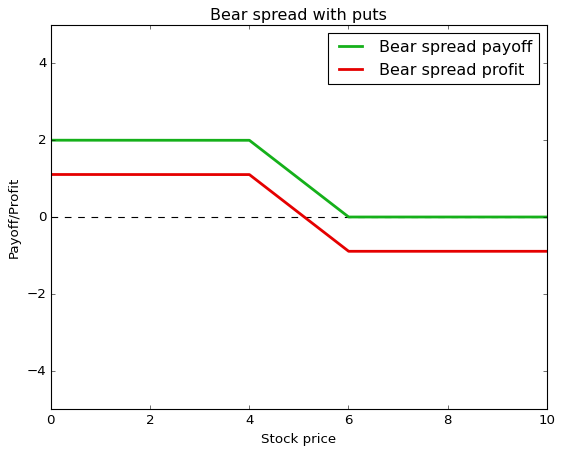

In [46]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Bear spread with puts')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = put_payoff(S, 6) - put_payoff(S, 4)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)

S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_put(S_t, 6, r, t, Sigma) - BS_put(S_t, 4, r, t, Sigma)
# since k1 = 6, k2 = 4, p1 > p2, p1 - p2 > 0, - (+) = -  --> move downward

plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Bear spread payoff', 'Bear spread profit'], loc='best')
#plt.savefig('Bear_spread_put.png', bbox_inches="tight", dpi=600)
plt.show()


## Butterflies 
- combining Bull spread + Bear spread ( from previous )

### Butterfly with all calls 
- k1 < k2 < k3
- long call at k1
- short call*2 at k2 
- long call at k3 
- C1 > C2 > C3 
- symmetric : k1 + k3 = 2*k2 
- since it produce non-neg payoff, the price of using this strat must be positive 
    - C1 + C3 - 2*C2 > 0 
    - => C1 + C3 > 2*C2 

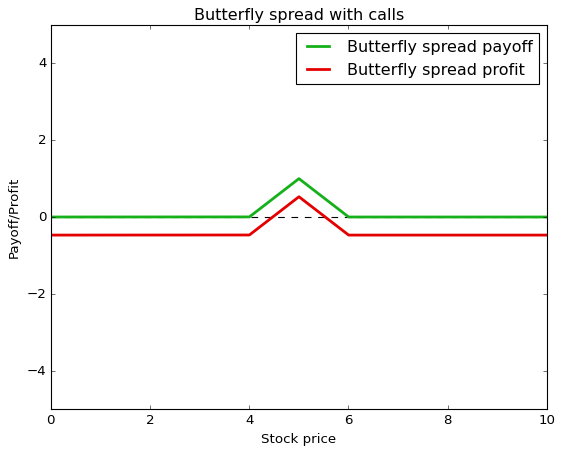

In [27]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Butterfly spread with calls')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = call_payoff(S, 4) - 2*call_payoff(S, 5) + call_payoff(S,6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)

S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_call(S_t, 4, r, t, Sigma) - 2*BS_call(S_t, 5, r, t, Sigma) +BS_call(S_t, 6, r, t, Sigma) 
# since k1 = 4, k2 = 5, k3 = 6, c1 > c2 > c3, c1 - 2*c2 + c3 > 0, - (+) = -  --> move downward

plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Butterfly spread payoff', 'Butterfly spread profit'], loc='best')
#plt.savefig('Butterfly_spread_call.png', bbox_inches="tight", dpi=600)
plt.show()

### Butterfly with puts 

- k3 > k2 > k1
- long put at k1 ( pay )
- short put*2 at k2 ( get )
- long put at k3 ( pay )
- P3 > P2 > P1 
- K1 + K3 = 2 * K2 
- P3 + P2 > 2 * P2 
    - 2* P2 - P1 - P3 = negative --> move downward

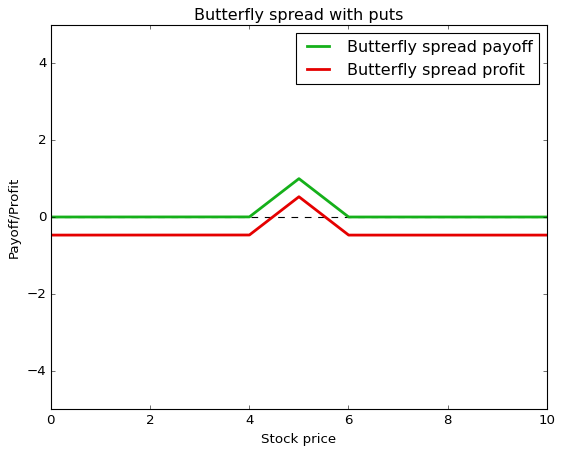

In [28]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Butterfly spread with puts')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = put_payoff(S, 4) - 2*put_payoff(S, 5) + put_payoff(S, 6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)

S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2

# the strat 
Cost = BS_put(S_t, 4, r, t, Sigma) - 2*BS_put(S_t, 5, r, t, Sigma) + BS_put(S_t,6, r, t, Sigma) 

plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Butterfly spread payoff', 'Butterfly spread profit'], loc='best')
#plt.savefig('Butterfly_spread_put.png', bbox_inches="tight", dpi=600)
plt.show()




### Straddles 
- long call on k 
- long put at k 

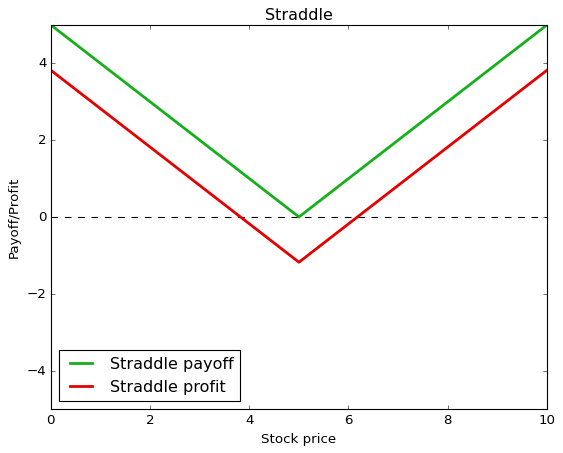

In [31]:
plt.style.use('classic')

S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)    # set up x axis 

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Straddle')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = call_payoff(S, 5) + put_payoff(S, 5)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.3
Cost = BS_call(S_t, 5, r, t, Sigma) + BS_put(S_t, 5, r, t, Sigma)
# k = 5 for both call, and pay for longing for both positions for call & put  --> move downward


plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Straddle payoff', 'Straddle profit'], loc='best')
#plt.savefig('Straddle.png', bbox_inches="tight", dpi=600)
plt.show()



### Strangles 
- k2 < k2 
- long put at k1 (pay premium)
- long call at k2 ( pay premium )
- both paying premium --> move downward 
- vs. straddle --> paying less premium ( since k1, k2 are OTM compare to ITM for staddle )



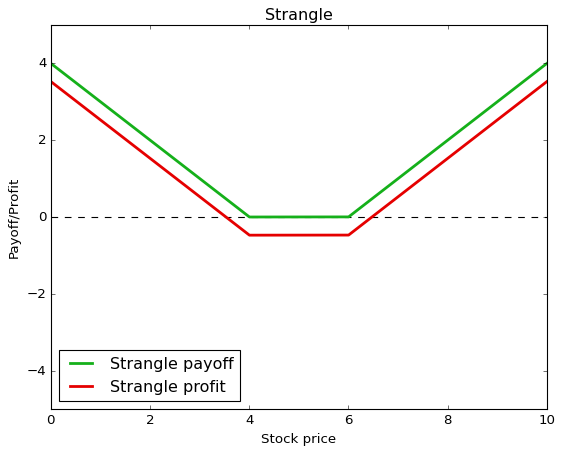

In [32]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Strangle')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 6) + put_payoff(S, 4)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5

r = 0.05
t = 1
Sigma = 0.3
Cost = BS_call(S_t, 6, r, t, Sigma) + BS_put(S_t, 4, r, t, Sigma)
# for both call amd put are the position of long, hence -( + ) = -  --> move downward


plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Strangle payoff', 'Strangle profit'], loc='best')
#plt.savefig('Strangle.png', bbox_inches="tight", dpi=600)
plt.show()


### Strips 
- long call at k 
- long put * 2 at k 
- decline are more likely than increase 

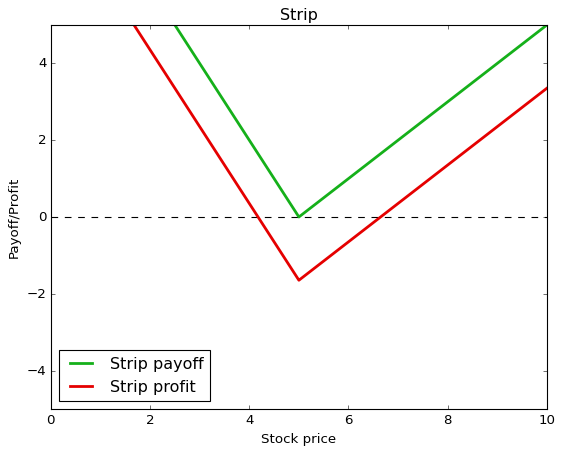

In [33]:
plt.style.use('classic')

S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Strip')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')


Payoff = call_payoff(S, 5) + 2*put_payoff(S, 5) # call + 2*put at same k price 

plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.3
Cost = BS_call(S_t, 5, r, t, Sigma) + 2*BS_put(S_t, 5, r, t, Sigma)
# k = 5 for both call, and pay for longing for both positions for call & put  --> move downward

plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Strip payoff', 'Strip profit'], loc='best')
#plt.savefig('Strip.png', bbox_inches="tight", dpi=600)
plt.show()



### Straps
- long call*2 at k : call 翹起來的地方會比較陡
- long put at k 
- increase more likely than decrease 

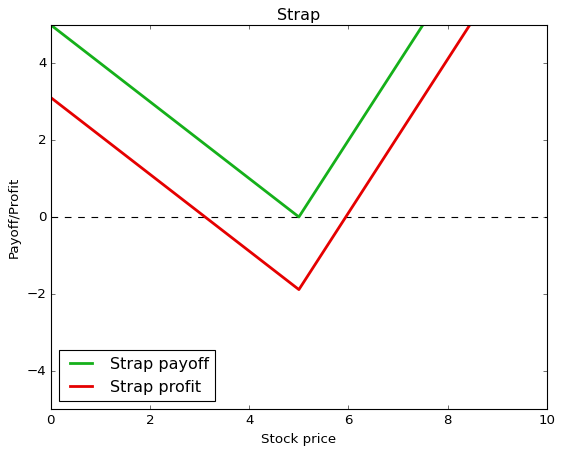

In [35]:
plt.style.use('classic')

S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Strap')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = 2*call_payoff(S, 5) + put_payoff(S, 5)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5

r = 0.05
t = 1
Sigma = 0.3
Cost = 2*BS_call(S_t, 5, r, t, Sigma) + BS_put(S_t, 5, r, t, Sigma) # all - ( + ) = -  --> move downward

plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Strap payoff', 'Strap profit'], loc='best')
#plt.savefig('Strip.png', bbox_inches="tight", dpi=600)
plt.show()



## Other 

### Collars 

- k1 < k2 
- long put at k1  ( pay )
- short call at k2 ( get )
- 

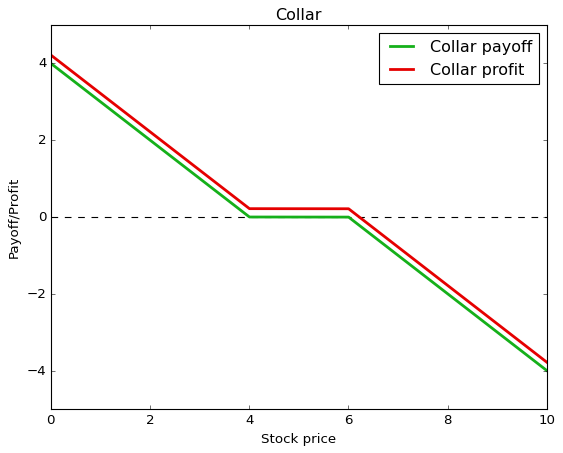

In [38]:
plt.style.use('classic')

S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Collar')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = -call_payoff(S, 6) + put_payoff(S, 4) 
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)

S_t = 5
r = 0.05
t = 1
Sigma = 0.3
# Cost = 2*BS_call(S_t, 5, r, t, Sigma) + BS_put(S_t, 5, r, t, Sigma)  --> might be wrong 
Cost = BS_put(S_t, 4, r, t, Sigma) - BS_call(S_t, 6, r, t, Sigma) # revised 


plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Collar payoff', 'Collar profit'], loc='best')
#plt.savefig('Collar.png', bbox_inches="tight", dpi=600)
plt.show()



### Box spread 
- k1< k2 
- long call at k1 
- short put at k1  --> these two get long forwards 
- short call at k2 
- long put at k2  --> these two get short forward
- synthetic to 0-coupon bond ( a horizontal line above zero )

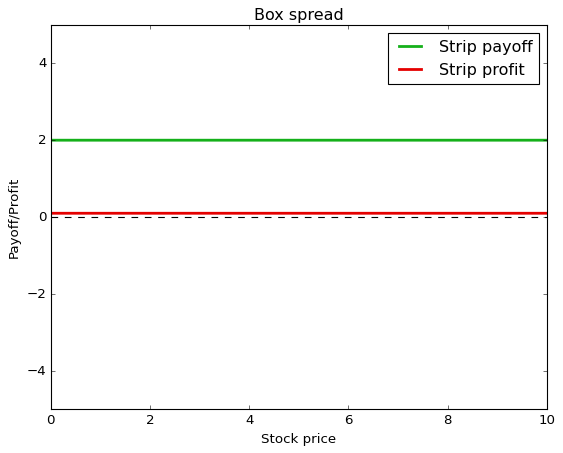

In [22]:
plt.style.use('classic')

S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Box spread')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = call_payoff(S, 4) - put_payoff(S, 4) + put_payoff(S,6) - call_payoff(S,6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)

S_t = 5
r = 0.05
t = 1
Sigma = 0.3
Cost = BS_call(S_t, 4, r, t, Sigma) - BS_put(S_t, 4, r, t, Sigma) + BS_put(S_t,6, r, t, Sigma) - BS_call(S_t, 6, r, t, Sigma)
# since k1 = 4, k2 = 6, C1 > C2, C1 - C2 > 0, P1 < P2, P2 - P1 > 0 , -->  - (+) = -  --> move downward


plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Strip payoff', 'Strip profit'], loc='best')
#plt.savefig('Strip.png', bbox_inches="tight", dpi=600)
plt.show()



### Ratio spread 
- k1  < k2 
- long call at k1 ( pay )
- short call *2  at k2 ( get )
- C1 > C2 
- 

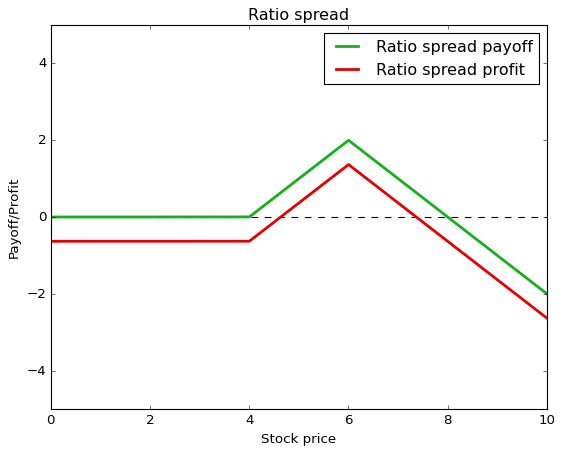

In [42]:
plt.style.use('classic')

S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Ratio spread')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

Payoff = call_payoff(S, 4) - 2*call_payoff(S, 6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.3

Cost = BS_call(S_t, 4, r, t, Sigma) - 2*BS_call(S_t, 6, r, t, Sigma)
# k1 = 4, k2 = 6 , c1 > c2 

plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Ratio spread payoff', 'Ratio spread profit'], loc='best')
#plt.savefig('Ratio_spread.png', bbox_inches="tight", dpi=600)
plt.show()



### condors : all calls 
- from small to big : k1 to k4 
- long call at k1 
- short call at k2 
- short call at k3 
- long call at k4 
- k1  + k4 = k2 + k3 
- bull spread  + bear spread , but at diff k price 
- pay less premium than butterfly spread 

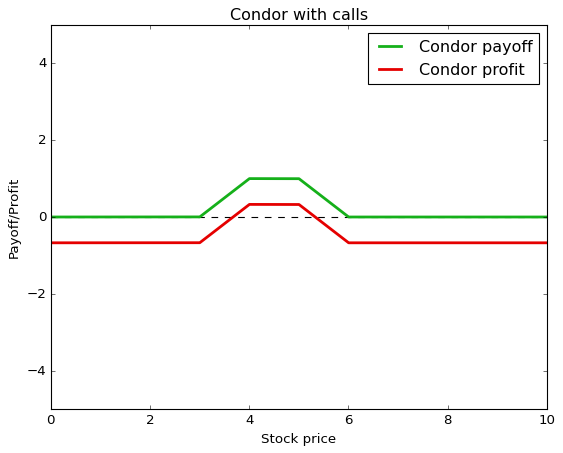

In [44]:
plt.style.use('classic')

S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Condor with calls')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 3) - call_payoff(S, 4) - call_payoff(S, 5) + call_payoff(S, 6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5

r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_call(S_t, 3, r, t, Sigma) - BS_call(S_t, 4, r, t, Sigma) - BS_call(S_t, 5, r, t, Sigma) + BS_call(S_t, 6, r, t, Sigma)
# c3 > c4, c5 > c6

plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Condor payoff', 'Condor profit'], loc='best')
#plt.savefig('Condor_call.png', bbox_inches="tight", dpi=600)
plt.show()




### Calendar spread : buys a longer-term call and sells a shorter-term call
- T1 < T2 
- long call at k with T2 
- short call at k wtih T1 
- C1 > C2 

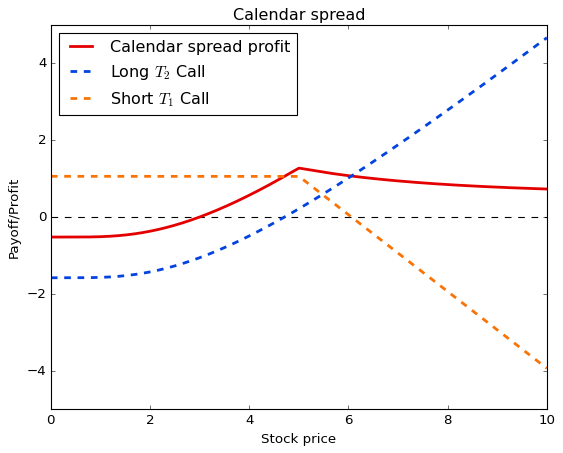

In [46]:
plt.style.use('classic')

S = 5
S = np.linspace(0.0001, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Calendar spread')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')

S_t = 5
r = 0.05
t_1 = 0.0001  # short term call 
t_2 = 5  # long term call 
Sigma = 0.3
#Payoff = BS_call(S, 5, r, t_1, Sigma) - BS_call(S, 5, r, t_2, Sigma)
#plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)

Payoff = BS_call(S, 5, r, t_2, Sigma) - BS_call(S, 5, r, t_1, Sigma) # long term call - short term call
Cost = BS_call(S_t, 5, r, 4, Sigma) - BS_call(S_t, 5, r, 2, Sigma) 
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)

Payoff = BS_call(S, 5, r, t_2, Sigma) - BS_call(S_t, 5, r, 4, Sigma) # longing long term call 
plt.plot(S, Payoff, '--', color='xkcd:blue', linewidth=2.5)

Payoff = -BS_call(S, 5, r, t_1, Sigma) + BS_call(S_t, 5, r, 2, Sigma) # selling short term call
plt.plot(S, Payoff, '--', color='xkcd:orange', linewidth=2.5)

plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Calendar spread profit', 'Long $T_2$ Call', 'Short $T_1$ Call'],loc='best')
#plt.savefig('Calendar_spread.png', bbox_inches="tight", dpi=600)
plt.show()

